# Question 4: Creating Figure 1

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [3]:
# compute the month average temperature from 2002 to 2012
avgTemperature2002_2012 = ds.analysed_sst.sel(lat = slice(33, 48), lon = slice(-132, -118), time=slice('2002','2012')).groupby('time.month').mean(dim='time')

In [4]:
# compute the month average temperature from 2014 to 2016 and put them into an array
month_temperatures = []
for year in range(2014, 2017):
    for month in range(1, 13):
        month_temperatures.append(ds.analysed_sst.sel(lat = slice(33, 48), lon = slice(-132, -118), time=f'{year}-{month}').mean(dim='time'))

In [5]:
# compute the bias between a specific month and the average
delta = []
for i in range(36):
    delta.append(month_temperatures[i] - avgTemperature2002_2012[i%12,:,])

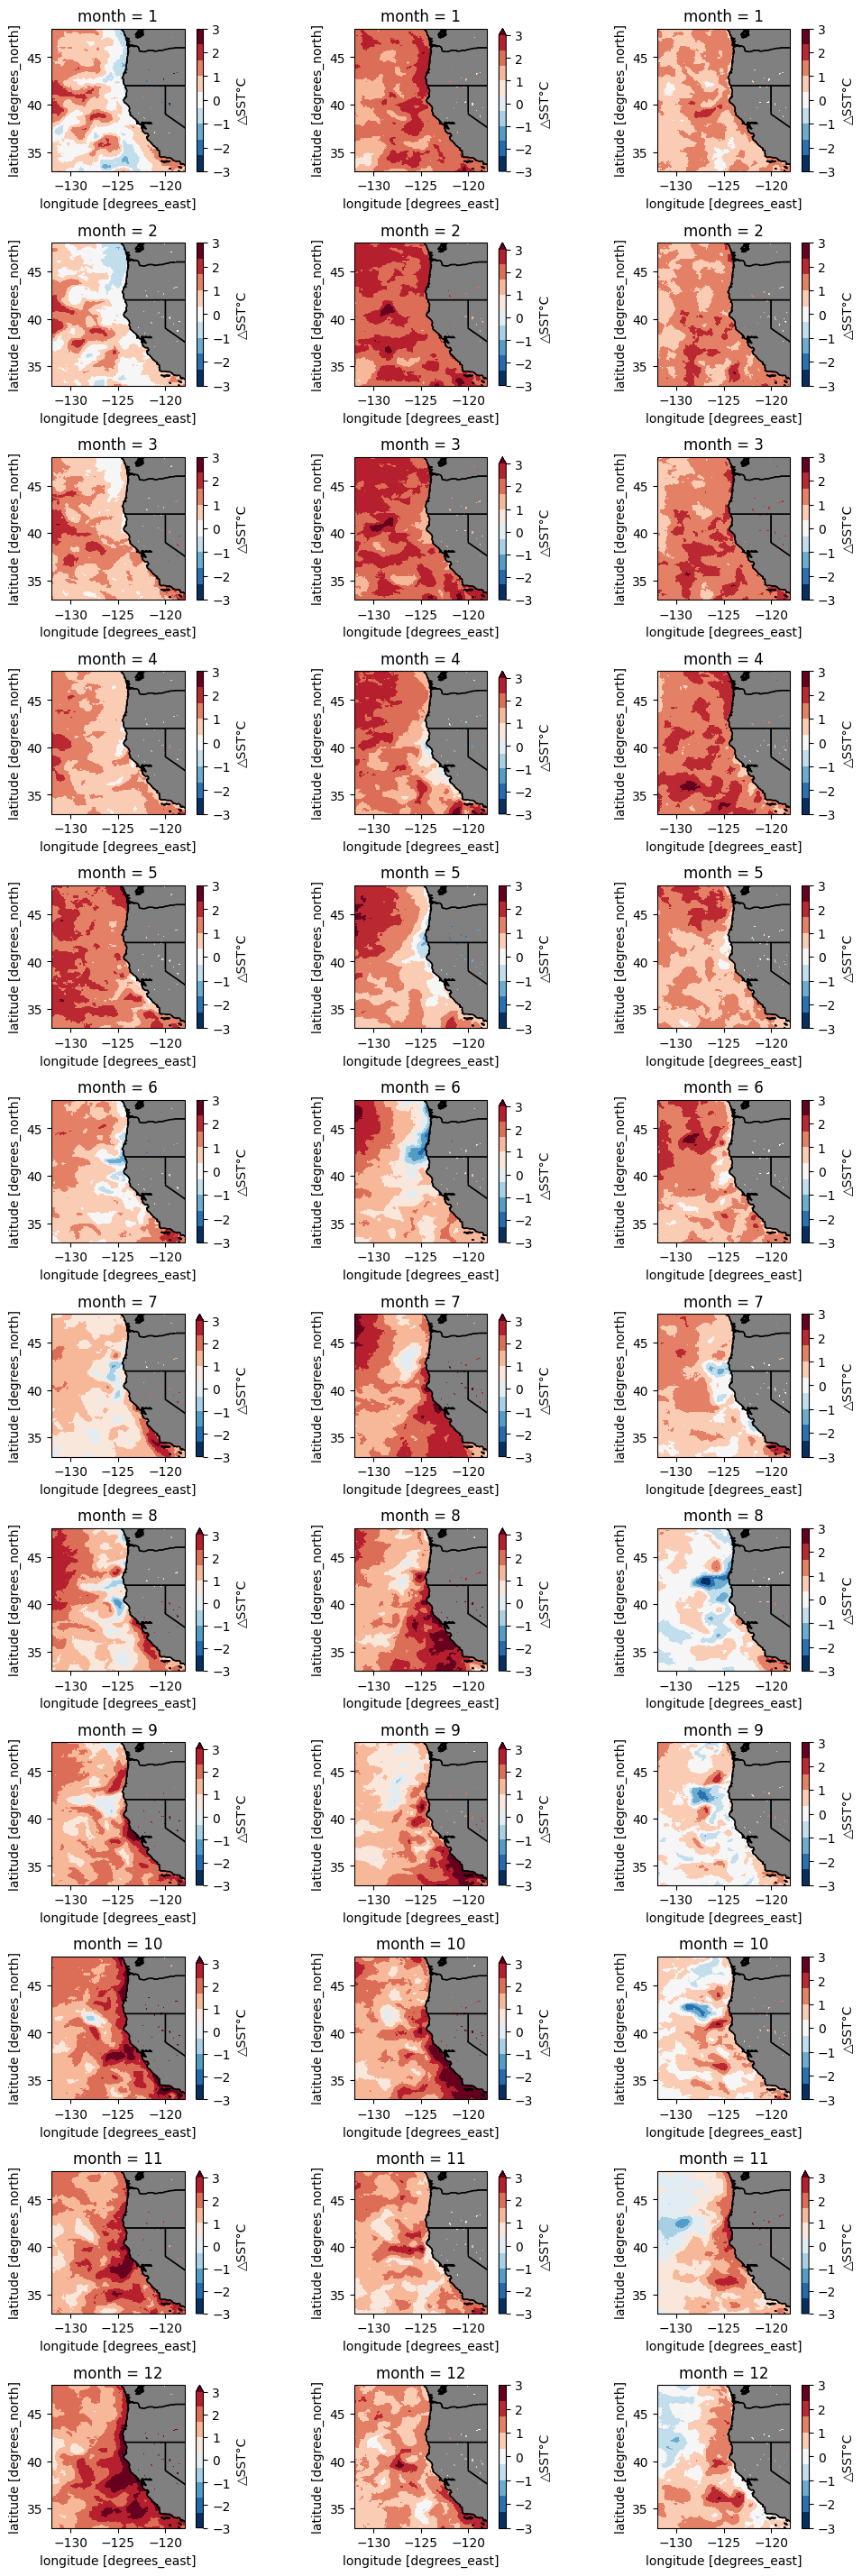

In [29]:
# plot
fig = plt.figure(figsize=(12, 36))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for j in range(1, 4):
    for i in range(12):
        ticks = [-3, -2, -1, 0, 1, 2, 3]
        levels = np.linspace(-3, 3, 10)
        # choose the right figure
        data = delta[12*(j-1)+i]
        ax = plt.subplot(12, 3, 3*i+j, projection=crs)
        # show axis
        ax.axes.get_xaxis().set_visible(True)
        ax.axes.get_yaxis().set_visible(True)
        # plot
        data.plot(ax=ax, transform=crs, levels=levels, cbar_kwargs={'ticks': ticks, 'label': '△SST°C', 'location': 'right'})
        ax.add_feature(cfeature.LAND, color="grey")
        ax.add_feature(cfeature.STATES.with_scale("10m"))
        ax.coastlines("10m", color="k")

plt.show()